In [3]:
!pip install tensorflow-gpu==2.0.0-alpha0
!pip install pandas-datareader

In [4]:
!apt install graphviz
!pip install pydot pydot-ng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data

tickers = '^BSESN'

start_date = '1980-12-01'
end_date = '2018-12-31'

stock_data = data.get_data_yahoo(tickers, start_date, end_date)

stock_data.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1997-07-01,4301.770020,4247.660156,4263.109863,4300.859863,0.0,4300.859863
1997-07-02,4395.310059,4295.399902,4302.959961,4333.899902,0.0,4333.899902
1997-07-03,4393.290039,4299.970215,4335.790039,4323.459961,0.0,4323.459961
1997-07-04,4347.589844,4300.580078,4332.700195,4323.819824,0.0,4323.819824
1997-07-07,4391.009766,4289.490234,4326.810059,4291.450195,0.0,4291.450195
1997-07-08,4313.000000,4252.490234,4285.649902,4306.390137,0.0,4306.390137
1997-07-09,4404.830078,4315.419922,4315.419922,4404.689941,0.0,4404.689941
1997-07-10,4448.060059,4376.109863,4413.390137,4378.370117,0.0,4378.370117
1997-07-11,4372.750000,4301.930176,4372.750000,4321.979980,0.0,4321.979980


In [6]:
stock_data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5294.000000,5294.000000,5294.000000,5294.000000,5.294000e+03,5294.000000
mean,14521.989159,14315.116543,14431.281549,14416.056772,3.617737e+04,14416.056772
std,9966.795656,9880.164236,9933.121309,9921.293057,6.123246e+05,9921.293057
min,2682.590088,2594.870117,2621.889893,2600.120117,0.000000e+00,2600.120117
25%,4628.932495,4539.050171,4581.982300,4578.585205,0.000000e+00,4578.585205
50%,14430.709961,14143.284668,14291.635254,14283.464844,1.140000e+04,14283.464844
75%,20334.897461,20079.215332,20228.362305,20214.790527,1.840000e+04,20214.790527
max,38989.648438,38760.578125,38989.648438,38896.628906,2.079310e+07,38896.628906


In [7]:
stock_data_len = stock_data['Close'].count()
print(stock_data_len)

5294


In [8]:
close_prices = stock_data.iloc[:, 1:2].values
print(close_prices)

[[ 4247.66015625]
 [ 4295.39990234]
 [ 4299.97021484]
 ...
 [35781.94921875]
 [35911.98828125]
 [36033.94921875]]


In [9]:
all_bussinessdays = pd.date_range(start=start_date, end=end_date, freq='B')
print(all_bussinessdays)

DatetimeIndex(['1980-12-01', '1980-12-02', '1980-12-03', '1980-12-04',
               '1980-12-05', '1980-12-08', '1980-12-09', '1980-12-10',
               '1980-12-11', '1980-12-12',
               ...
               '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', length=9936, freq='B')


In [10]:
close_prices = stock_data.reindex(all_bussinessdays)
close_prices = stock_data.fillna(method='ffill')

In [11]:
close_prices.head(10)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1997-07-01,4301.770020,4247.660156,4263.109863,4300.859863,0.0,4300.859863
1997-07-02,4395.310059,4295.399902,4302.959961,4333.899902,0.0,4333.899902
1997-07-03,4393.290039,4299.970215,4335.790039,4323.459961,0.0,4323.459961
1997-07-04,4347.589844,4300.580078,4332.700195,4323.819824,0.0,4323.819824
1997-07-07,4391.009766,4289.490234,4326.810059,4291.450195,0.0,4291.450195
1997-07-08,4313.000000,4252.490234,4285.649902,4306.390137,0.0,4306.390137
1997-07-09,4404.830078,4315.419922,4315.419922,4404.689941,0.0,4404.689941
1997-07-10,4448.060059,4376.109863,4413.390137,4378.370117,0.0,4378.370117
1997-07-11,4372.750000,4301.930176,4372.750000,4321.979980,0.0,4321.979980


In [16]:
training_set = close_prices.iloc[:, 1:2].values

In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled.shape)

(5294, 1)


In [19]:
features = []
labels = []
for i in range(60, stock_data_len):
    features.append(training_set_scaled[i-60:i, 0])
    labels.append(training_set_scaled[i, 0])

features = np.array(features)
labels = np.array(labels)

features = np.reshape(features, (features.shape[0], features.shape[1], 1))

In [20]:
print(features.shape)

(5234, 60, 1)


In [21]:
features = []
labels = []
for i in range(60, stock_data_len):
    features.append(training_set_scaled[i-60:i, 0])
    labels.append(training_set_scaled[i, 0])

features = np.array(features)
labels = np.array(labels)

features = np.reshape(features, (features.shape[0], features.shape[1], 1))

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled.shape)

(5294, 1)


In [22]:
!pip install tensorflow

In [30]:
!pip uninstall -y tensorflow
!pip install tensorflow==1.15

Uninstalling tensorflow-2.5.0:
  Successfully uninstalled tensorflow-2.5.0
     |████████████████████████████████| 412.3MB 19kB/s 
     |████████████████████████████████| 3.8MB 29.9MB/s 
     |████████████████████████████████| 512kB 37.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7557 sha256=403a88105d643eb9d5a820f92c676670dee2445a5c7eff454d2773dbec3f2293
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.15.0 which is incompatible.
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successful

In [23]:
import tensorflow as tf

In [24]:


model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (features.shape[1], 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 50, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 50, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 1)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [25]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [26]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [27]:
from time import time
start = time()
history = model.fit(features, labels, epochs = 20, batch_size = 32, verbose = 1)
end = time()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5234 samples
Epoch 1/20
5234/5234 [==============================] - 46s 9ms/sample - loss: 0.0077
Epoch 2/20
5234/5234 [==============================] - 43s 8ms/sample - loss: 0.0021
Epoch 3/20
5234/5234 [==============================] - 42s 8ms/sample - loss: 0.0019
Epoch 4/20
5234/5234 [==============================] - 43s 8ms/sample - loss: 0.0017
Epoch 5/20
5234/5234 [==============================] - 43s 8ms/sample - loss: 0.0016
Epoch 6/20
5234/5234 [==============================] - 43s 8ms/sample - loss: 0.0014
Epoch 7/20
5234/5234 [==============================] - 43s 8ms/sample - loss: 0.0015
Epoch 8/20
5234/5234 [==============================] - 43s 8ms/sample - loss: 0.0012
Epoch 9/20
5234/5234 [==============================] - 43s 8ms/sample - loss: 0.0013
Epoch 10/20
5234/5234 [==============================] - 43s 8ms/sample - loss: 0.0012
Epoch 11/20
5234/5234 [

(68, 1)


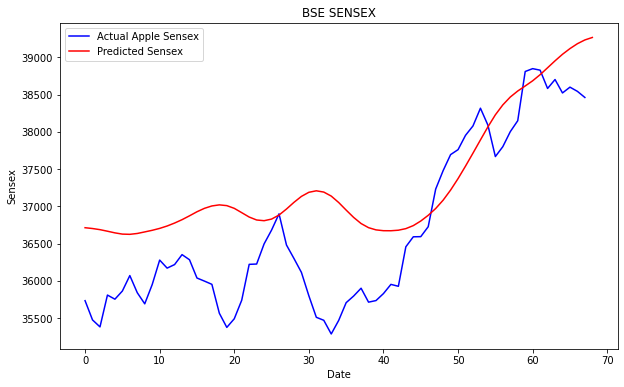

In [28]:
testing_start_date = '2019-01-01'
testing_end_date = '2019-04-10'

test_stock_data = data.get_data_yahoo(tickers, testing_start_date, testing_end_date)

test_stock_data.tail()

test_stock_data_processed = test_stock_data.iloc[:, 1:2].values
print(test_stock_data_processed.shape)

all_stock_data = pd.concat((stock_data['Close'], test_stock_data['Close']), axis = 0)

inputs = all_stock_data[len(all_stock_data) - len(test_stock_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 129):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.figure(figsize=(10,6))  
plt.plot(test_stock_data_processed, color='blue', label='Actual Apple Sensex')  
plt.plot(predicted_stock_price , color='red', label='Predicted Sensex')  
plt.title('BSE SENSEX')  
plt.xlabel('Date')  
plt.ylabel('Sensex')  
plt.legend()  
plt.show()  